# Business Case : Salaire dans les métiers de la data

## Introduction
Dans cette analyse, nous avons exploré les salaires des métiers dans le domaine de la **data** pour fournir des recommandations sur l’emplacement d’un nouveau bureau pour un cabinet spécialisé dans les métiers de la **data**.

En tant que **Data Analyst**, nous avons utilisé des données provenant de différents profils d’emploi pour proposer des insights clairs sur les tendances salariales et les choix de localisations les plus intéressants.

---

## Objectifs

L'objectif de cette analyse est de répondre aux questions suivantes :

- Quels profils privilégier pour l'implantation d'un nouveau bureau ?
- Quelle est la tendance salariale dans les métiers de la data ?
- Quelles recommandations peuvent être faites pour la prise de décision stratégique sur la localisation du futur bureau ?

---

## Plan de résolution

### **1. Exploration et Nettoyage des données**

#### **1.1 Chargement des données**

In [28]:
import pandas as pd

# Charger le dataset
url = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/refs/heads/main/datasets/ds_salaries%20-%20Vanilla.csv"
df = pd.read_csv(url)

#### **1.2 Description des données**

In [29]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [31]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [32]:
# Vérifier les valeurs manquantes
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [33]:
# Supprimer les doublons
df = df.drop_duplicates()

Voici les premières informations du dataset après avoir le chargement et une première exploration des données :

- Il y a un total de 607 enregistrements dans le dataset.
- Aucune valeur manquante
- Les doublons éventuels ont été supprimés.

##### **Description des variables**

1. **`Unnamed: 0`** : Index ou identifiant de la ligne, à supprimer.
2. **`work_year`** : Année de l'observation, utile pour analyser les tendances temporelles des salaires.
3. **`experience_level`** : Niveau d'expérience (Junior, Mid-Level, Senior, ***abréviations***)), permet de comparer les salaires selon l'expérience.
4. **`employment_type`** : Type de contrat (CDI, CDD, Freelance, ***abréviations anglaises***) important pour analyser l'impact du statut sur les salaires.
5. **`job_title`** : Intitulé du poste (Data Analyst, Data Scientist, etc.), essentiel pour comparer les salaires entre les différents métiers.
6. **`salary`** : Salaire brut annuel (devise locale), variable principale de l'analyse.
7. **`salary_currency`** : Devise du salaire (***abréviation devise***), utile pour les conversions monétaires.
8. **`salary_in_usd`** : Salaire en USD (***US Dollars***), standardisé pour les comparaisons internationales.
9. **`employee_residence`** : Localisation de l'employé (***abréviation pays***), aide à analyser l'impact géographique sur les salaires.
10. **`remote_ratio`** : Ratio de télétravail (***en %***), permet d'examiner l'impact du télétravail sur les salaires.
11. **`company_location`** : Localisation de l'entreprise (***abréviation pays***), utile pour l'analyse géographique des salaires.
12. **`company_size`** : Taille de l'entreprise (***Small, Medium, Large***), permet d'analyser l'impact de la taille de l'entreprise sur les salaires.

##### **Variables principales pour l'analyse :**
- **`work_year`**
- **`experience_level`**
- **`employment_type`**
- **`job_title`**
- **`salary_in_usd`**
- **`remote_ratio`**
- **`company_location`**
- **`company_size`**

#### **1.3 Analyse préliminaire**

<Axes: title={'center': ' Top 10 Répartition des métiers'}, xlabel='job_title'>

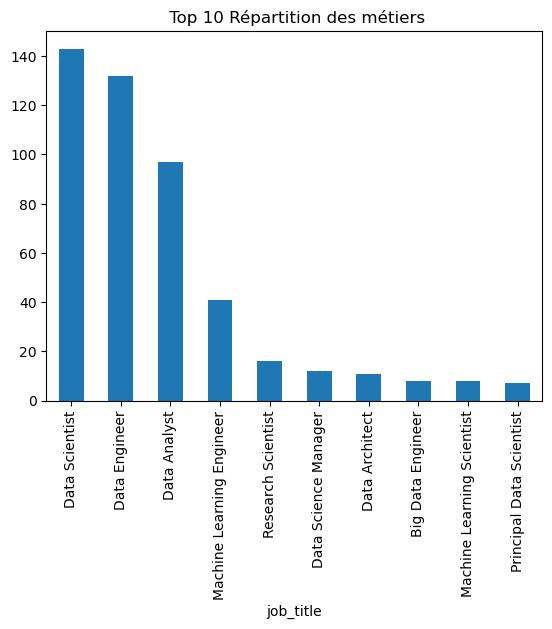

In [34]:
# Répartition des métiers
df['job_title'].value_counts().head(10).plot(kind='bar', title=' Top 10 Répartition des métiers')


<Axes: title={'center': 'Répartition des types de contrat'}, xlabel='employment_type'>

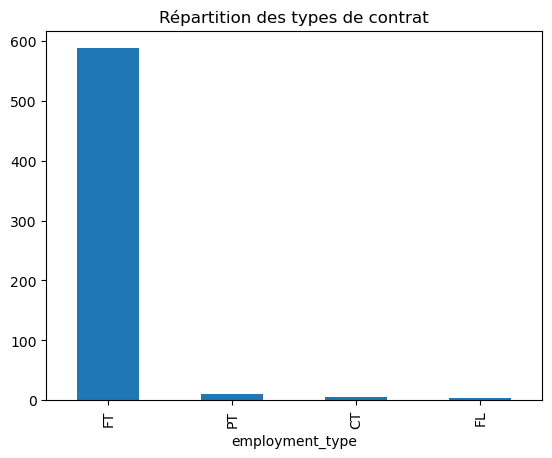

In [35]:
# Répartition des types de contrat
df['employment_type'].value_counts().plot(kind='bar', title='Répartition des types de contrat')

**Signification des abréviations** :

- **FT** : Full-Time (CDI Temps plein)
- **PT** : Part-Time (CDI Temps partiel)
- **CT** : Contract (CDD)
- **FL** : Freelance

<Axes: title={'center': "Répartition des niveaux d'expérience"}, xlabel='experience_level'>

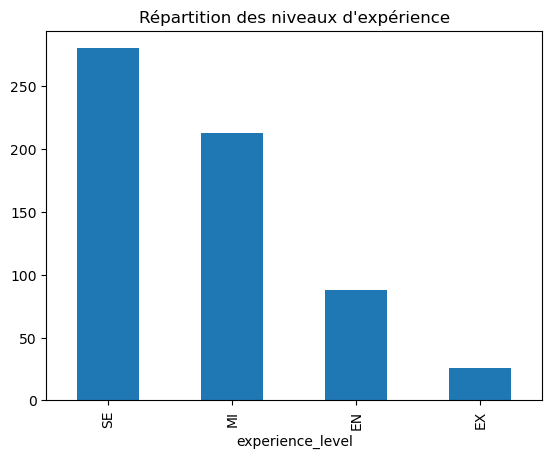

In [36]:
# Répartition des niveaux d'expérience
df['experience_level'].value_counts().plot(kind='bar', title="Répartition des niveaux d'expérience")

**Signification des abréviations** :

- **EX** : Executive (Poste de direction)
- **SE** : Senior
- **MI** : Niveau Intermédiaire
- **EN** : Junior - Débutant

<Axes: title={'center': 'Répartition de la taille des entreprises'}, xlabel='company_size'>

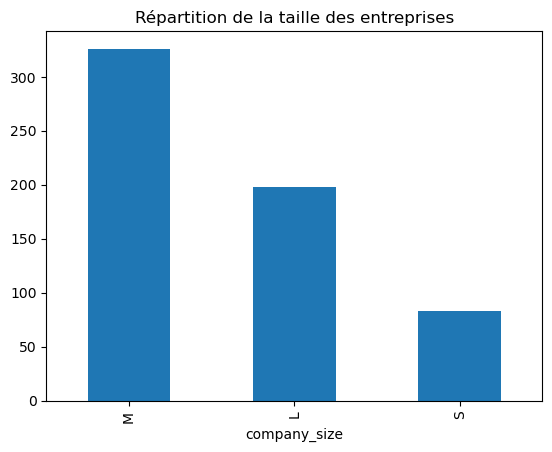

In [37]:
# Répartition de la taille des entreprises
df['company_size'].value_counts().plot(kind='bar', title='Répartition de la taille des entreprises')

<Axes: title={'center': 'Top 10 des localisations des entreprises'}, xlabel='company_location'>

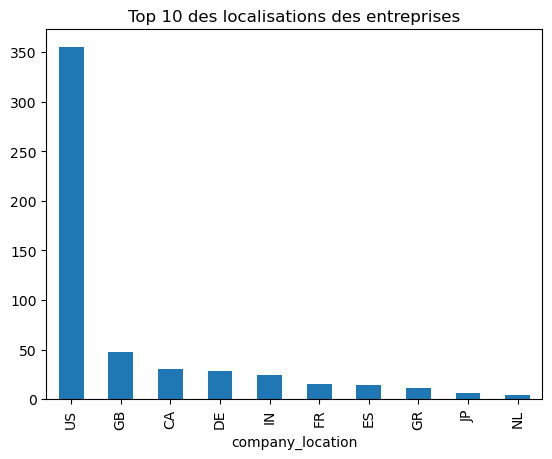

In [38]:
# Répartition géographique
df['company_location'].value_counts().head(10).plot(kind='bar', title='Top 10 des localisations des entreprises')

##### **Conclusion Analyse Préliminaire :**

Nous avons exploré plusieurs dimensions du dataset pour en tirer des informations clés. Voici les résultats des principales analyses :

- **Répartition des métiers** : Nous avons observé que les postes les plus fréquents sont **Data Scientist, Data Engineer et Data Analyst**.

- **Répartition des contrats** : Les contrats CDI sont largement dominants.

- **Répartition de la taille des entreprises** : Les entreprises de taille moyenne sont les plus nombreuses. (***M = L + S environ***)

- **Répartition géographique** : Les entreprises sont majoritairement situées aux ***Etats Unis, puis Grande Bretagne, Canada, Allemagne, Inde***.

#### **1.4 Préparation du DataFrame**

Pour rendre le dataset plus clair, plus accessible en vue de l'analyse PowerBi ; nous allons attribuer des noms clairs et compréhensibles en français.

##### **1.4.1 Intitulé des Colonnes**

In [39]:
# Renommer les colonnes
df.rename(columns={
    'Unnamed: 0': 'id',
    'work_year': 'année',
    'experience_level': 'niveau_experience',
    'employment_type': 'type_contrat',
    'job_title': 'intitulé_poste',
    'salary': 'salaire',
    'salary_currency': 'devise_salaire',
    'salary_in_usd': 'salaire_usd',
    'employee_residence': 'résidence_employé',
    'remote_ratio': 'télétravail_ratio',
    'company_location': 'localisation_entreprise',
    'company_size': 'taille_entreprise'
}, inplace=True)

In [40]:
# Supprimer les colonnes inutiles
df.drop(columns=['id', 'salaire', 'devise_salaire', 'résidence_employé'], inplace=True)

In [41]:
df.rename(columns={'salaire_usd' : 'salaire'}, inplace=True)

##### **1.4.2 Remplacement des valeurs**

In [42]:
# Niveau d'expérience
df['niveau_experience'] = df['niveau_experience'].replace({
    'SE': 'Sénior',
    'MI': 'Intermédiaire',
    'EN': 'Junior',
    'EX': 'Expert'
})

In [43]:
# Type de contrat
df['type_contrat'] = df['type_contrat'].replace({
    'FT': 'CDI Temps plein',
    'PT': 'CDI Temps partiel',
    'CT': 'CDD',
    'FL': 'Freelance'
})

In [44]:
df.sample(5)

,année,niveau_experience,type_contrat,intitulé_poste,salaire,télétravail_ratio,localisation_entreprise,taille_entreprise
473,2022,Sénior,CDI Temps plein,Data Scientist,140000,100,US,M
588,2022,Sénior,CDI Temps plein,Data Analyst,99000,0,US,M
462,2022,Intermédiaire,CDI Temps partiel,Data Engineer,54957,50,DE,L
50,2020,Junior,CDI Temps plein,Data Analyst,6072,0,IN,S
484,2022,Sénior,CDI Temps plein,Data Engineer,210000,100,US,M


##### **1.4.3 Export du DataFrame pour l'utilisation PowerBi**

In [45]:
# Réinitialiser les index
df.reset_index(drop=True, inplace=True)

# Exporter en CSV
df.to_csv('salaire_metiers_data.csv', index=False, encoding='utf-8')